<a href="https://colab.research.google.com/github/leonaardoas/PCA-COVID19/blob/main/PCA_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.decomposition import  PCA
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Projetos Machine Learning /COVID-19/Dataset-PCA.csv')
df = df.apply(lambda x: x.str.replace(',', '.', regex=False) if x.dtype == 'object' else x)
df = df.apply(lambda x: pd.to_numeric(x, errors='coerce') if x.name != 'MUNICÍPIO' else x)
df['mortalidade'] = 100000*df['Óbitos covid']/df['População Censo 2022']
df['pib per capita'] = df['PIB']/df['População Censo 2022']
df['hab/leito'] = df['População Censo 2022']/df['Número de Leitos']
df['dose/hab'] = df['Total de Doses Aplicadas']/df['População Censo 2022']
df

,MUNICÍPIO,Óbitos covid,População Estimada (2021),População Estimada (2022),População Censo 2022,Área,Razão masc/fem,Idade média,PIB,Número de Leitos,Índice de Saneamento,IDH,Total de Doses Aplicadas,mortalidade,pib per capita,hab/leito,dose/hab
0,Angra dos Reis,621,210171,181228,167418,813.42,1.00,30.97,10728194000,259,17.76,0.73,381889,370.927857,64080.290052,646.401544,2.281051
1,Aperibé,35,12036,10893,11034,94.54,0.97,34.89,223202000,35,6.88,0.72,28139,317.201378,20228.566250,315.257143,2.550208
2,Araruama,525,136109,126726,129669,638.28,0.94,33.54,3528684000,173,13.44,0.69,328816,404.877033,27213.011591,749.531792,2.535810
3,Areal,56,12763,11765,11828,110.72,0.98,33.15,389603000,21,0.00,0.72,3677,473.452824,32939.042949,563.238095,0.310873
4,Armação dos Búzios,83,35060,39033,40006,70.98,0.99,31.35,2084042000,69,11.10,0.68,77874,207.468880,52093.236015,579.797101,1.946558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Três Rios,317,82468,76789,78346,322.84,0.92,33.66,5347738000,258,0.79,0.73,217817,404.615424,68257.958288,303.666667,2.780193
86,Valença,250,77202,72264,67753,1300.77,0.92,35.03,2249765000,313,9.54,0.74,198494,368.987351,33205.393119,216.463259,2.929671
87,Varre-Sai,12,11208,10209,10207,201.94,1.01,31.19,247750000,23,40.09,0.66,2458,117.566376,24272.558048,443.782609,0.240815
88,Vassouras,148,37262,38081,33976,536.07,0.91,33.74,1282392000,338,25.23,0.71,102459,435.601601,37744.054627,100.520710,3.015629


In [4]:
colums_remove = [	'Óbitos covid',
                  'População Censo 2022',
                  'População Estimada (2021)',
                  'População Estimada (2022)',
                  'Área',	'PIB',
                  'Número de Leitos',
                  'IDH',
                  'Total de Doses Aplicadas']

dfr= df.drop(columns= colums_remove).round(1)
dfr

,MUNICÍPIO,Razão masc/fem,Idade média,Índice de Saneamento,mortalidade,pib per capita,hab/leito,dose/hab
0,Angra dos Reis,1.0,31.0,17.8,370.9,64080.3,646.4,2.3
1,Aperibé,1.0,34.9,6.9,317.2,20228.6,315.3,2.6
2,Araruama,0.9,33.5,13.4,404.9,27213.0,749.5,2.5
3,Areal,1.0,33.2,0.0,473.5,32939.0,563.2,0.3
4,Armação dos Búzios,1.0,31.4,11.1,207.5,52093.2,579.8,1.9
...,...,...,...,...,...,...,...,...
85,Três Rios,0.9,33.7,0.8,404.6,68258.0,303.7,2.8
86,Valença,0.9,35.0,9.5,369.0,33205.4,216.5,2.9
87,Varre-Sai,1.0,31.2,40.1,117.6,24272.6,443.8,0.2
88,Vassouras,0.9,33.7,25.2,435.6,37744.1,100.5,3.0


In [5]:
inf = np.sum(np.isinf(dfr['hab/leito'])) #Fui rodar o PCA e deu erro dizendo que havia valores inf. Identifiquei isso ocorre em 5 valores na coluna mencionada
inf
dfr = dfr.replace([np.inf, -np.inf], 0) #Troquei esses valores por 0, valor que deveria ser efetivamente
dfr.describe()

,Razão masc/fem,Idade média,Índice de Saneamento,mortalidade,pib per capita,hab/leito,dose/hab
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.967778,33.395556,20.903333,365.601111,41937.591111,827.922222,2.351111
std,0.049328,1.550347,15.529801,145.127867,34789.638866,1900.087338,0.638510
min,0.900000,29.800000,0.000000,58.200000,15142.800000,0.000000,0.200000
25%,0.900000,32.300000,9.025000,264.825000,22456.900000,317.675000,2.225000
50%,1.000000,33.650000,19.050000,365.800000,29127.550000,450.500000,2.400000
75%,1.000000,34.500000,28.550000,457.850000,43861.750000,722.650000,2.700000
max,1.100000,37.200000,68.800000,710.700000,180528.800000,17288.000000,3.900000


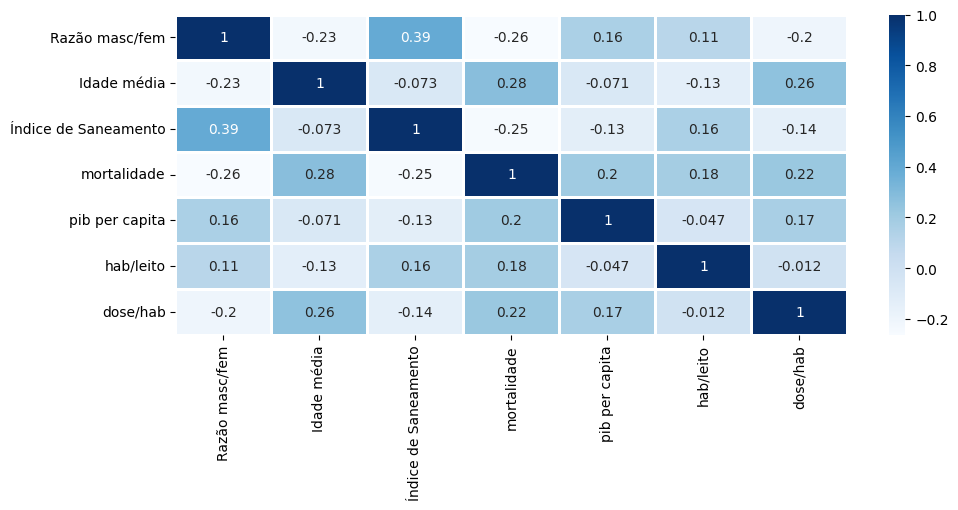

In [33]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.subplots_adjust(left=0.2, right=0.9, top=0.5, bottom=0.1)

sns.heatmap(correlation, cmap='Blues', linewidth=2, annot=True)

plt.show()

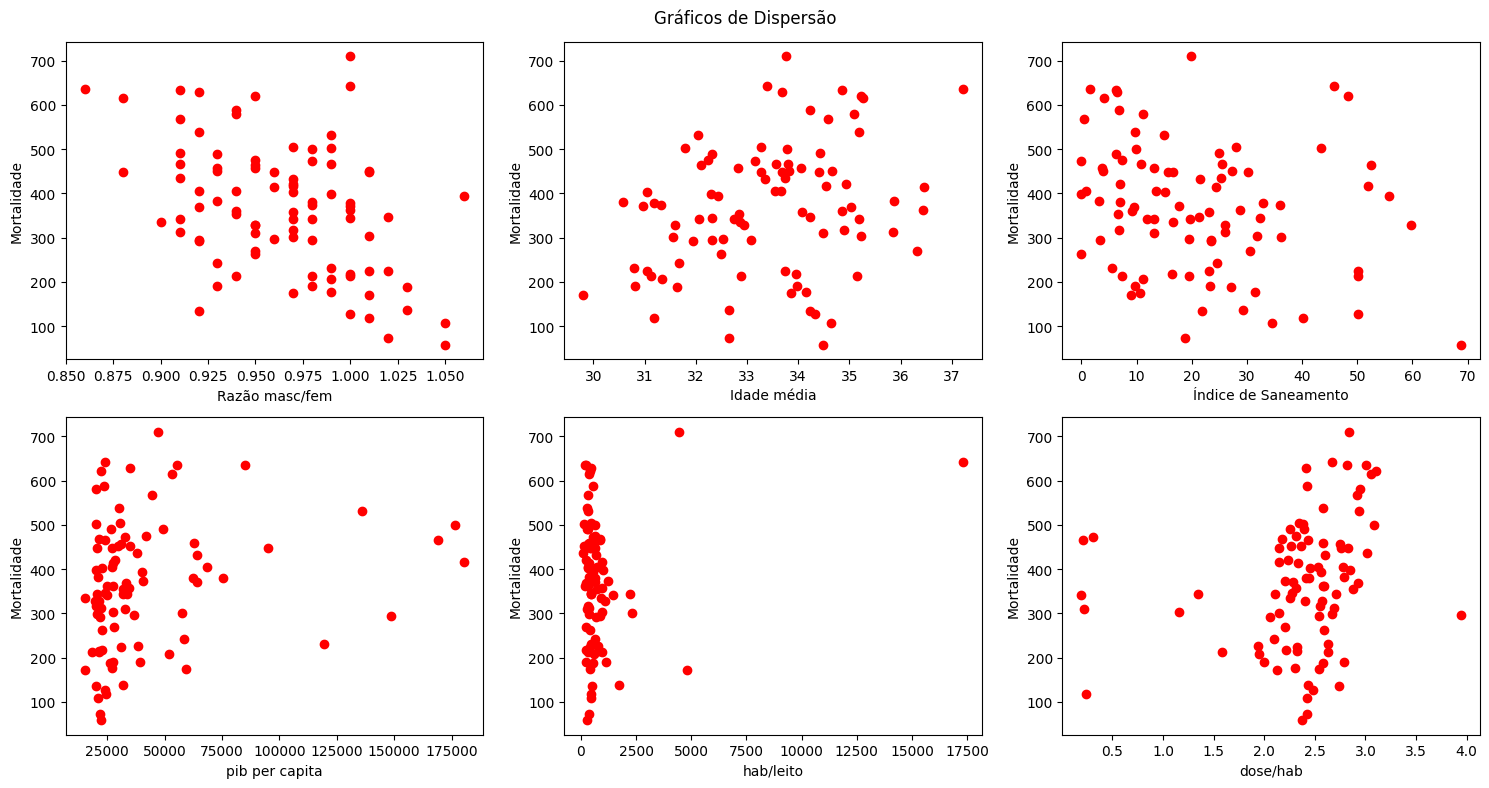

In [7]:
plt.figure(figsize=(15, 8))  # Ajusta o tamanho da figura

plt.suptitle("Gráficos de Dispersão")

plt.subplot(231)
plt.scatter(df["Razão masc/fem"], df["mortalidade"], color='red')
plt.xlabel("Razão masc/fem")
plt.ylabel("Mortalidade")

plt.subplot(232)
plt.scatter(df["Idade média"], df["mortalidade"], color='red')
plt.xlabel("Idade média")
plt.ylabel("Mortalidade")

plt.subplot(233)
plt.scatter(df["Índice de Saneamento"], df["mortalidade"], color='red')
plt.xlabel("Índice de Saneamento")
plt.ylabel("Mortalidade")

plt.subplot(234)
plt.scatter(df["pib per capita"], df["mortalidade"], color='red')
plt.xlabel("pib per capita")
plt.ylabel("Mortalidade")

plt.subplot(235)
plt.scatter(df["hab/leito"], df["mortalidade"], color='red')
plt.xlabel("hab/leito")
plt.ylabel("Mortalidade")

plt.subplot(236)
plt.scatter(df["dose/hab"], df["mortalidade"], color='red')
plt.xlabel("dose/hab")
plt.ylabel("Mortalidade")

plt.tight_layout()  # evitar sobreposições
plt.show()

In [8]:
labels = dfr.drop(columns=['MUNICÍPIO'])

In [9]:
normalization = preprocessing.scale(labels.T)

In [10]:
pca =PCA()
pca.fit(normalization)

PCA()

In [11]:
pca_data = pca.transform(normalization)

In [12]:
percent = np.round(pca.explained_variance_ratio_* 100, decimals=1)
components = ['PC' + str(x) for x in range(1, len(percent)+1)]


In [13]:
percent
components

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']

In [14]:
pca_df = pd.DataFrame(pca_data, index=['Razão masc/fem', 'Idade média', 'Índice de Saneamento',	'mortalidade',	'pib per capita', 'hab/leito',	'dose/hab'], columns = components)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Razão masc/fem,-4.046047,-0.340983,-0.034185,-0.005550,-2.413267e-03,-3.010785e-04,2.519555e-15
Idade média,-4.016857,-0.338066,-0.027267,-0.000952,6.306520e-03,-1.150018e-05,1.865346e-15
Índice de Saneamento,-4.027083,-0.337545,-0.031967,0.012078,-1.558630e-03,1.280227e-06,1.718891e-15
mortalidade,-3.734594,-0.295083,0.131296,-0.000107,-2.377087e-04,-1.879020e-07,1.109249e-15
pib per capita,23.165867,-0.042709,-0.001376,-0.000006,-2.851048e-06,-2.470790e-10,-9.378676e-15
hab/leito,-3.296444,1.695263,-0.002663,-0.000016,-5.187810e-07,2.369151e-09,6.600849e-17
dose/hab,-4.044843,-0.340877,-0.033839,-0.005449,-2.093544e-03,3.114842e-04,2.583322e-15


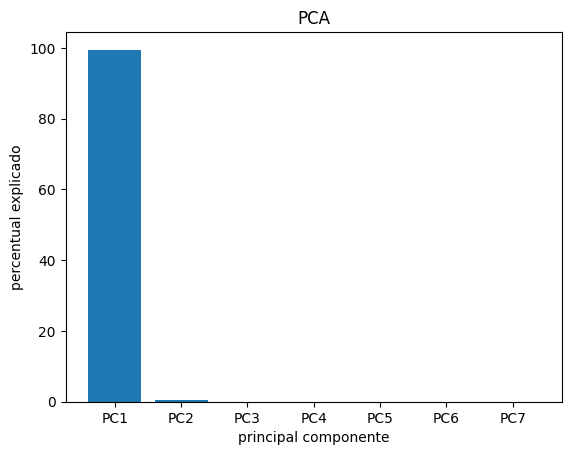

In [15]:
plt.bar(x=range(1,len(percent)+1), height=percent, tick_label=components)
plt.ylabel('percentual explicado')
plt.xlabel('principal componente')
plt.title('PCA')
plt.show()


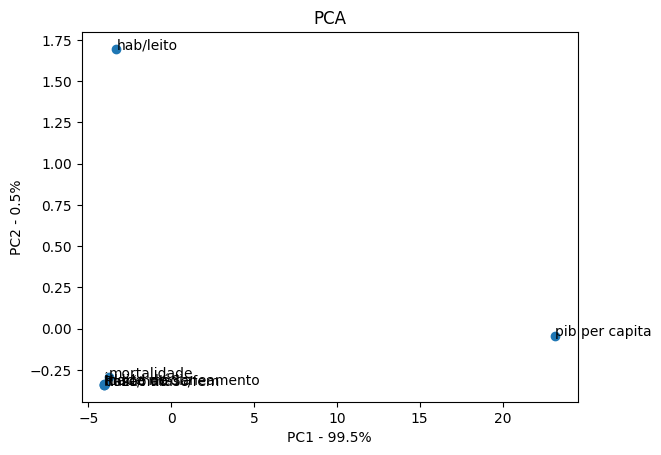

In [16]:
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('PCA')
plt.xlabel('PC1 - {0}%'.format(percent[0]))
plt.ylabel('PC2 - {0}%'.format(percent[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

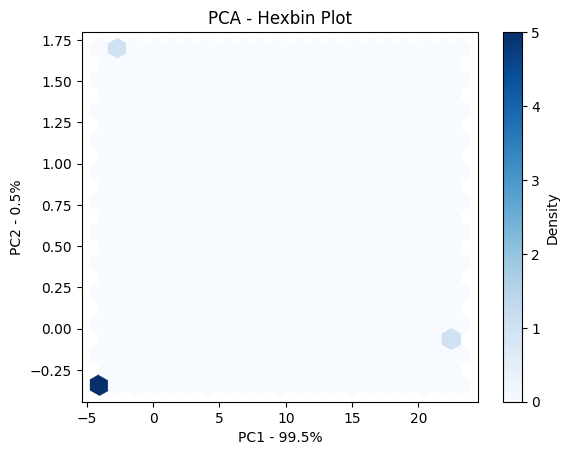

In [17]:
plt.hexbin(pca_df['PC1'], pca_df['PC2'], gridsize=20, cmap='Blues')
plt.title('PCA - Hexbin Plot')
plt.xlabel('PC1 - {0}%'.format(percent[0]))
plt.ylabel('PC2 - {0}%'.format(percent[1]))
plt.colorbar(label='Density')
plt.show()

In [28]:
score = pd.Series(pca.components_[0], index=[dfr.MUNICÍPIO])
orderscore = score.abs().sort_values(ascending=False)

scoremunicipio = orderscore[0:].index.values

print(score[scoremunicipio])

MUNICÍPIO         
Casimiro de Abreu     0.105699
Nova Iguaçu           0.105698
Araruama              0.105698
Rio das Ostras        0.105698
Pinheiral             0.105698
                        ...   
Iguaba Grande         0.105634
Sapucaia              0.105466
São João de Meriti    0.105366
Japeri                0.101201
Porciúncula           0.083985
Length: 90, dtype: float64
